# Tutorial: display on-sky footprint

`Telescope` instance provides a function to calculate the detector footprints on the sky. This notebook demonstrates how to use the function.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from warpfield.telescope import display_sources, get_subplot

In [2]:
from astropy.coordinates import SkyCoord, Longitude, Latitude, Angle
from astropy.time import Time
import astropy.units as u

An artificial source set is used in this notebook. Load the coordinate file and convert to the `SkyCoord` instance. The artificial sources are distributed around the Galactic center. The telescope is pointed toward the Galactic center too. The position angle of the telescope is set to 0.0 deg in the galactic coordinate.

In [3]:
coo = np.loadtxt('sample.coo')
src = SkyCoord(coo[:,0]*u.deg, coo[:,1]*u.deg, frame='galactic')

Create a `Telescope` instance. Here, we define a telescope with four InGaAs detectors tiled in 2&times;2.

In [4]:
from warpfield.telescope.jasmine import get_jasmine

The telescope is pointed toward the Galactic center, and the position angle of the telescope is aligned north-up.

In [5]:
pointing = SkyCoord(0.0*u.deg,0.0*u.deg, frame='galactic')
position_angle = Angle(0.0, unit='degree')
jasmine = get_jasmine(pointing, position_angle)

The focal plane of the telescope is illustrated. The red rectangles are the InGaAs detectors. The gray rectangle is an available region of the focal plane.

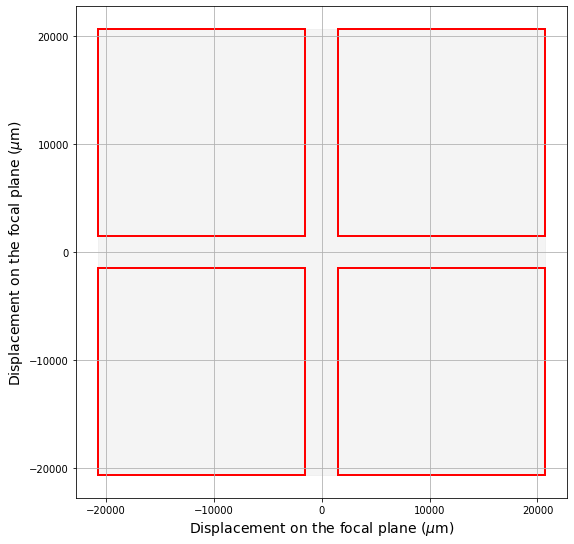

In [6]:
fig,ax = plt.subplots(figsize=(8,8))
jasmine.display_focal_plane(ax)
fig.tight_layout()
plt.show()

The figure below shows the on-sky distribution of the artifical sources with the detector footprints.

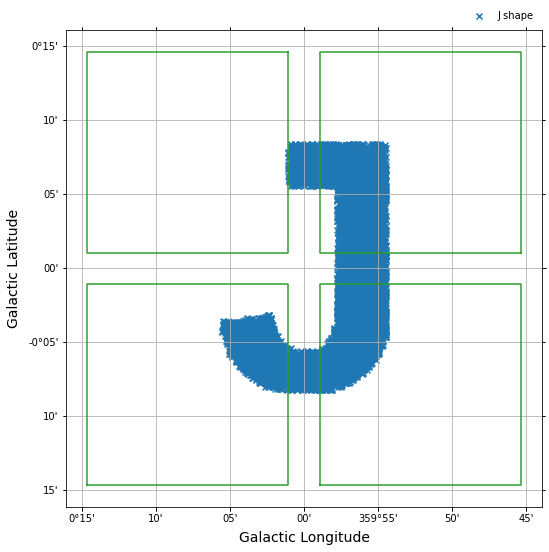

In [7]:
fig,ax = get_subplot(pointing, figsize=(8,8))
display_sources(ax, src, title='J shape')
jasmine.overlay_footprints(ax, color='C2', label='footprint')
fig.tight_layout()
plt.show()

Here is another example with a different telescope. Point-spread functions at the four corners of the focal plane can be degraded in the latest design of JASMINE. Thus, the available focal plane is truncated to an octagonal shape. Set the option `octagonal` true to obtain the truncated optics.

In [8]:
pointing = SkyCoord(0.0*u.deg,0.0*u.deg, frame='galactic')
position_angle = Angle(0.0, unit='degree')
jasmine = get_jasmine(pointing, position_angle, octagonal=True)

The layout of the focal plane is illustrated. The available region is truncated.

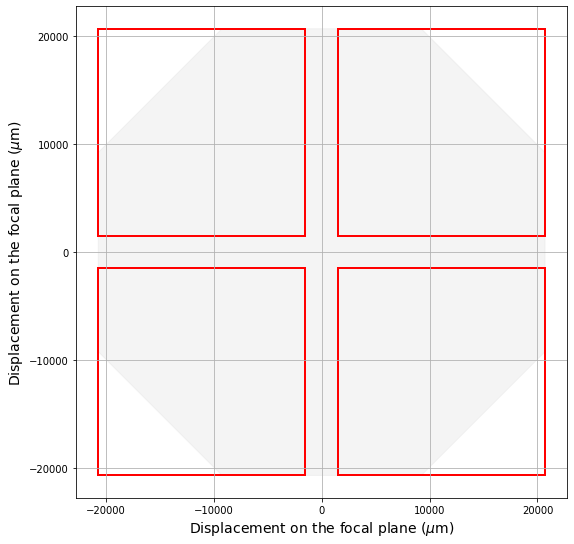

In [9]:
fig,ax = plt.subplots(figsize=(8,8))
jasmine.display_focal_plane(ax)
fig.tight_layout()
plt.show()

The detector footprints on the sky are truncated as well.

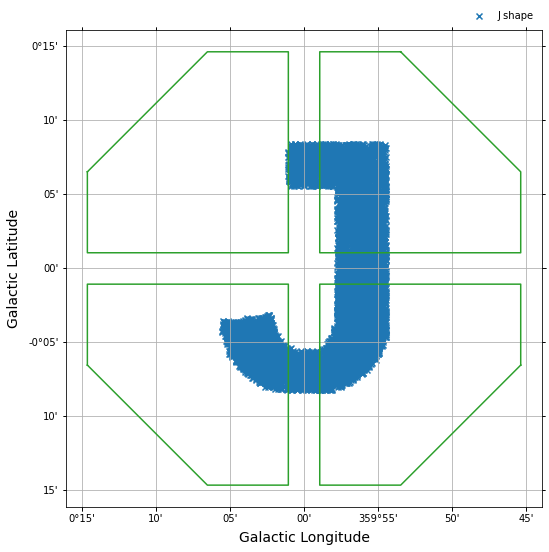

In [10]:
fig,ax = get_subplot(pointing, figsize=(8,8))
display_sources(ax, src, title='J shape')
jasmine.overlay_footprints(ax, color='C2', label='footprint')
fig.tight_layout()
plt.show()